In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'nics-firearm-background-checks-cleaned.csv'
data = pd.read_csv(file_path)

# Inspect the data
data.head()


,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,redemption_other,returned_handgun,returned_long_gun,returned_other,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,totals
0,9/1/2023,Alabama,10342,145,15421,12848,1156,1052,0,14,...,18,40,0,0,29,21,14,0,1,44556
1,9/1/2023,Alaska,188,10,2429,2543,262,197,0,0,...,1,29,15,0,0,1,0,0,0,5922
2,9/1/2023,Arizona,9113,2014,14398,8239,1575,931,0,14,...,8,214,9,0,6,6,0,1,0,38189
3,9/1/2023,Arkansas,2139,181,5645,6108,437,466,6,8,...,4,0,0,0,6,13,2,0,0,17207
4,9/1/2023,California,28611,15559,33792,20548,4295,0,0,1,...,31,2185,1283,56,7289,3093,529,26,10,118625


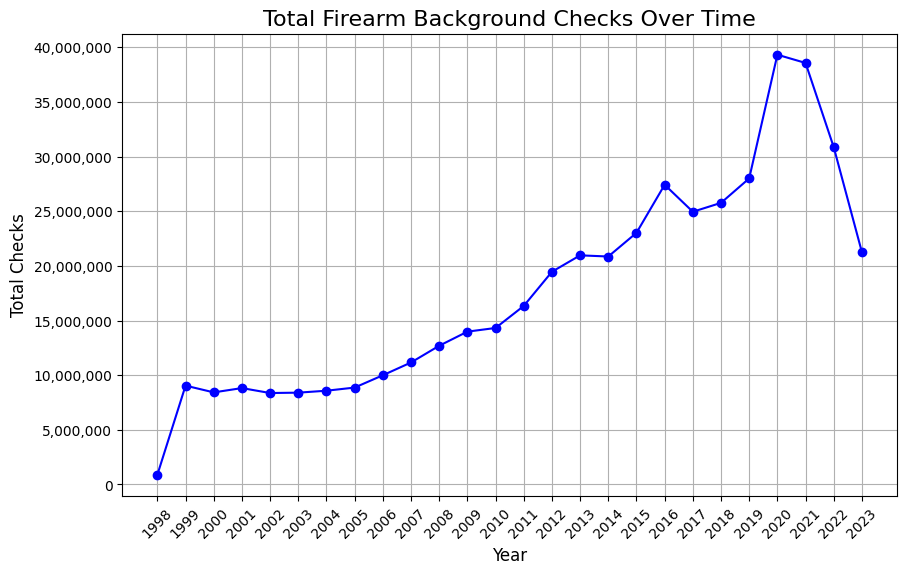

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load dataset
file_path = 'nics-firearm-background-checks-cleaned.csv'
data = pd.read_csv(file_path)

# Convert 'year' to datetime and extract the year
data['year'] = pd.to_datetime(data['year'], errors='coerce').dt.year

# Drop duplicates and clean data
data = data.drop_duplicates()
data['totals'] = pd.to_numeric(data['totals'], errors='coerce').fillna(0)

# Group by year and sum totals
trend_data = data.groupby('year')['totals'].sum().reset_index().sort_values(by='year')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(trend_data['year'], trend_data['totals'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Total Firearm Background Checks Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Checks', fontsize=12)

# Format Y-axis with thousands separators
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Rotate X-axis labels to avoid overlap
plt.xticks(ticks=trend_data['year'], rotation=45)
plt.grid(True)

# Show the plot
plt.show()



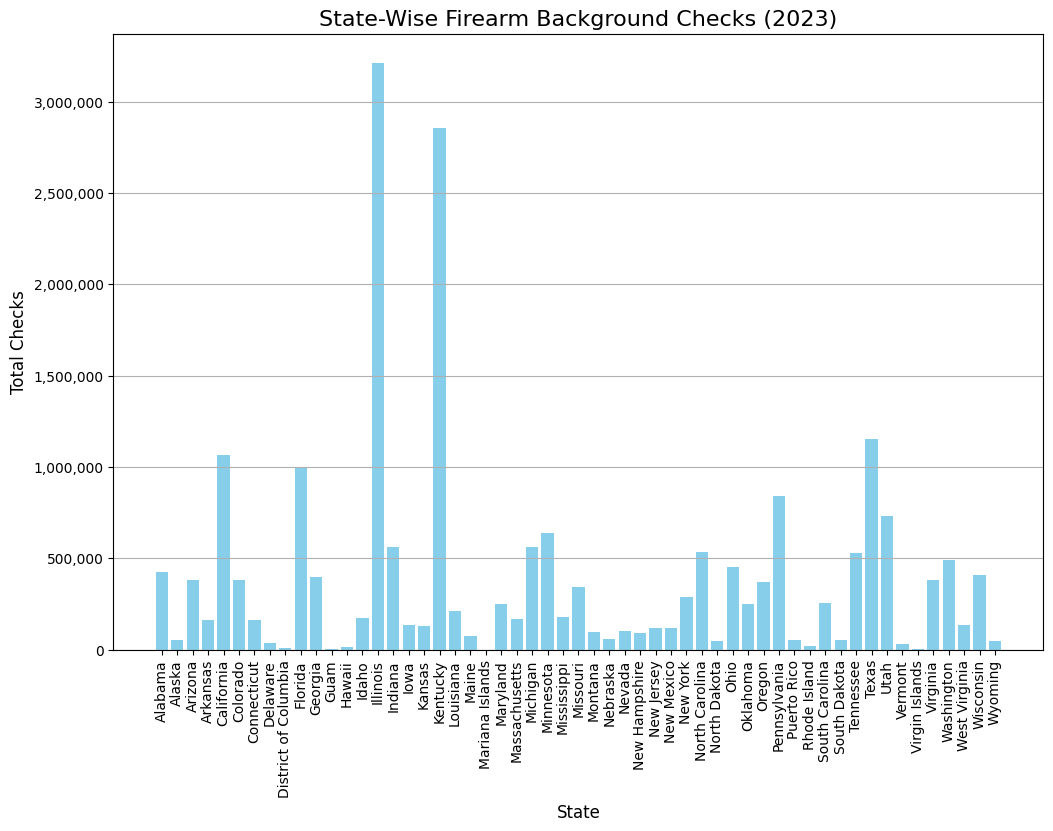

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'nics-firearm-background-checks-cleaned.csv'
data = pd.read_csv(file_path)

# Convert 'year' to datetime and extract the year
data['year'] = pd.to_datetime(data['year'], errors='coerce').dt.year

# Drop duplicates and clean data
data = data.drop_duplicates()
data['totals'] = pd.to_numeric(data['totals'], errors='coerce').fillna(0)

# Filter data for the year 2023
data_2023 = data[data['year'] == 2023]

# Group by state and calculate total checks
state_data = data_2023.groupby('state')['totals'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(state_data['state'], state_data['totals'], color='skyblue')
plt.title('State-Wise Firearm Background Checks (2023)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Checks', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Format Y-axis to display as integers with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot
plt.show()


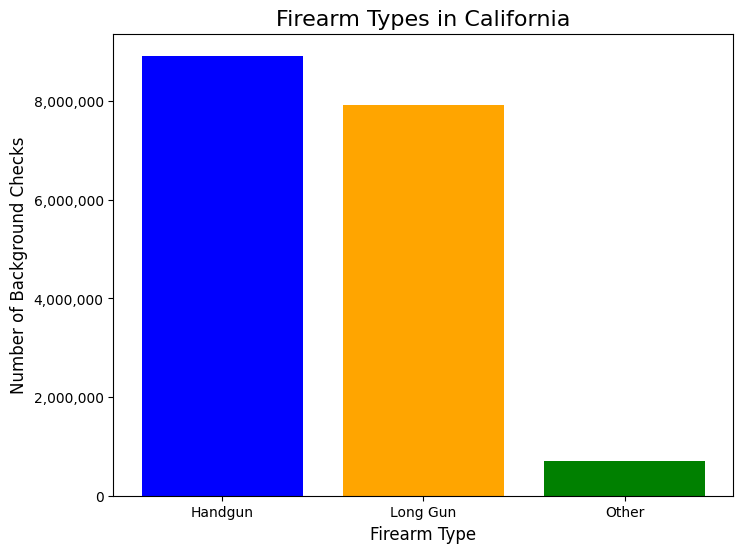

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'nics-firearm-background-checks-cleaned.csv'
data = pd.read_csv(file_path)

# Convert 'year' to datetime and extract the year
data['year'] = pd.to_datetime(data['year'], errors='coerce').dt.year

# Drop duplicates and clean data
data = data.drop_duplicates()
columns_to_convert = ['handgun', 'long_gun', 'other']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0)

# Filter data for California and sum firearm types
california_data = data[data['state'] == 'California'][['handgun', 'long_gun', 'other']].sum()

# Rename indices for better readability
california_data.index = ['Handgun', 'Long Gun', 'Other']

# Plot the bar chart with updated labels
plt.figure(figsize=(8, 6))
plt.bar(california_data.index, california_data.values, color=['blue', 'orange', 'green'])
plt.title('Firearm Types in California', fontsize=16)
plt.xlabel('Firearm Type', fontsize=12)
plt.ylabel('Number of Background Checks', fontsize=12)

# Format Y-axis with thousands separators
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot
plt.show()
